## 1. Загрузка данных

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes

# Загрузим датасет о диабете
df = pd.read_csv('D:/Загрузки/diabetes.csv')
print("Размер датасета:", df.shape)
print("\nПервые 5 строк:")
print(df.head())

Размер датасета: (768, 9)

Первые 5 строк:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


## 2. Разведочный анализ данных


Статистическое описание данных:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
mi

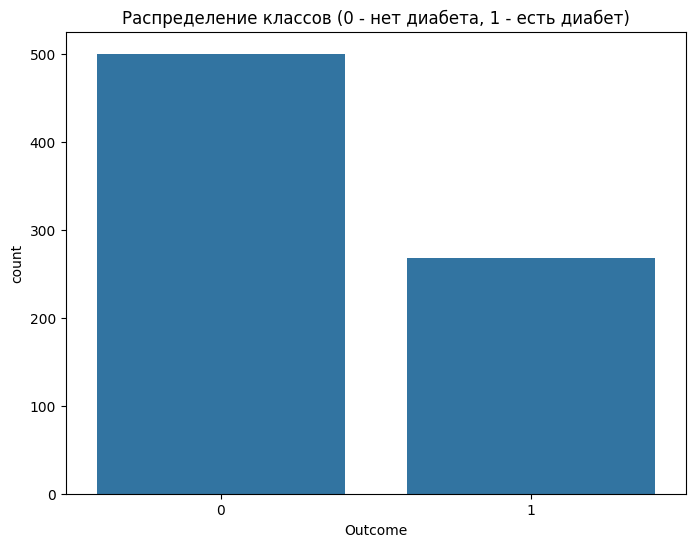

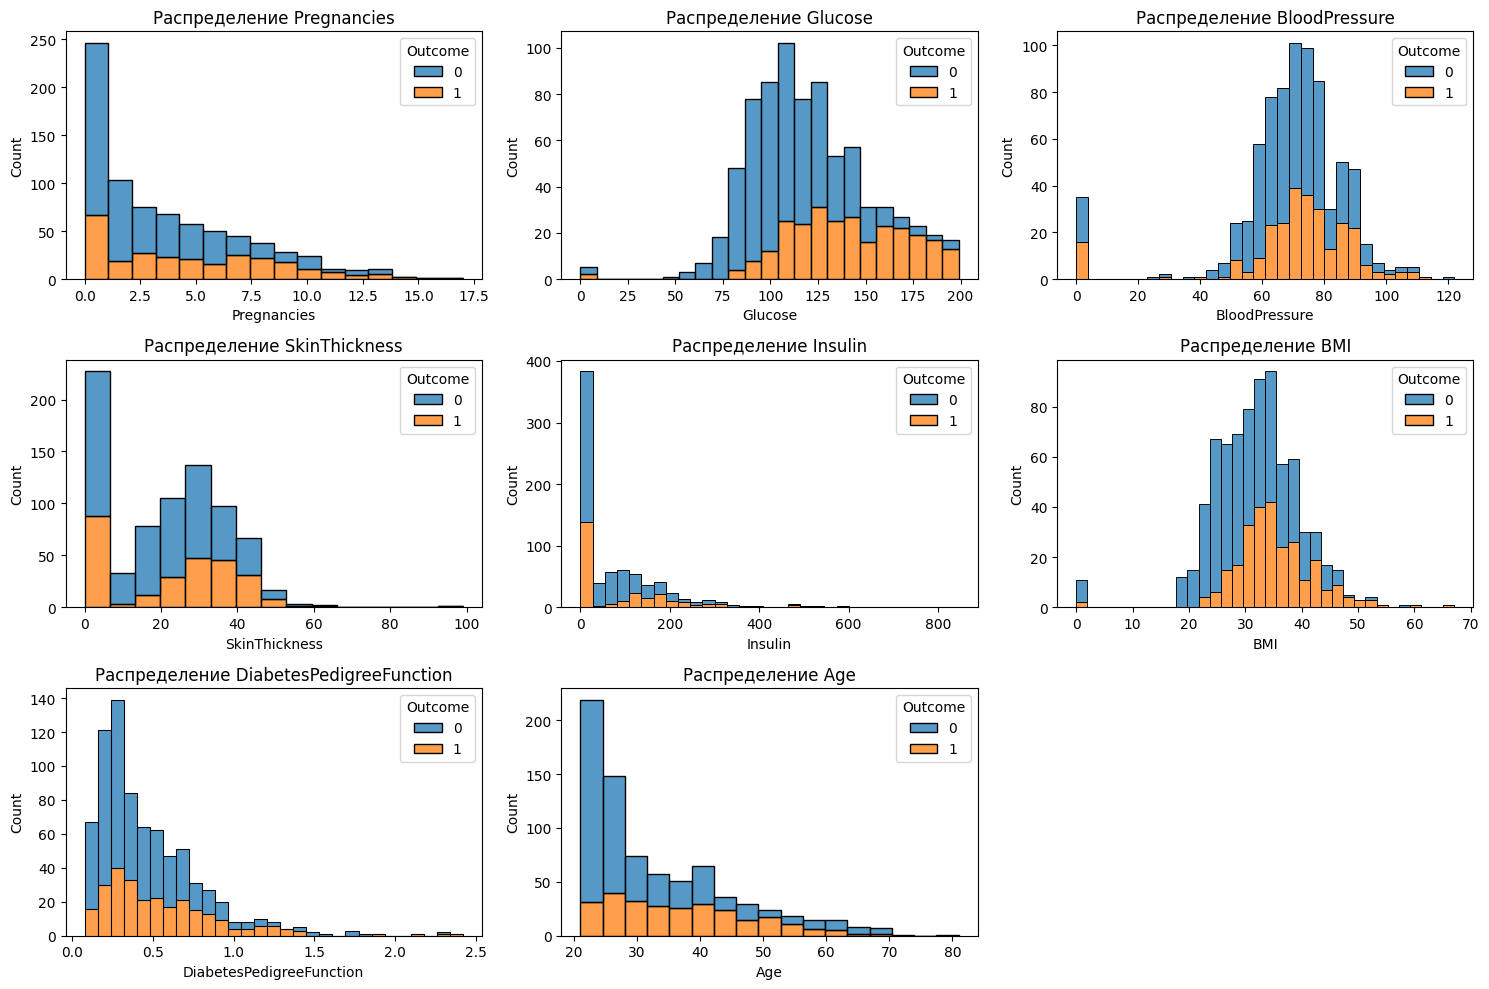

In [3]:
# Базовая статистика
print("\nСтатистическое описание данных:")
print(df.describe())

# Проверка пропущенных значений
print("\nПропущенные значения:")
print(df.isnull().sum())

# Распределение классов
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Outcome')
plt.title('Распределение классов (0 - нет диабета, 1 - есть диабет)')
plt.show()

# Распределение числовых признаков
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=column, hue='Outcome', multiple="stack")
    plt.title(f'Распределение {column}')
plt.tight_layout()
plt.show()

## 3. Выбор признаков и подготовка данных

**Признаки**
 - Pregnancies: Количество беременностей
 - Glucose: Уровень глюкозы
 - BloodPressure: Артериальное давление
 - SkinThickness: Толщина кожной складки
 - Insulin: Уровень инсулина
 - BMI: Индекс массы тела
 - DiabetesPedigreeFunction: Функция родословной диабета
 - Age: Возраст
 - Outcome: Целевая переменная (0 или 1)

**Обработка выбросов и масштабирование данных**

In [7]:
# Обработка выбросов и некорректных значений
def handle_zeros(df):
    # Замена нулевых значений на медиану для признаков, где 0 невозможен
    zero_not_possible = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']
    
    for column in zero_not_possible:
        median = df[df[column] != 0][column].median()
        df[column] = df[column].replace(0, median)
    
    return df

df_processed = handle_zeros(df.copy())

# Масштабирование данных
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df_processed.drop('Outcome', axis=1)
y = df_processed['Outcome']
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# До масштабирования
print("До масштабирования:")
print(df_processed.head())

# После масштабирования
print("\nПосле масштабирования:")
print(X_scaled.head())

До масштабирования:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35      125  33.6   
1            1       85             66             29      125  26.6   
2            8      183             64             29      125  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

После масштабирования:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.866045      -0.031990       0.670643 -0.181541  0.166619   
1    -0.844885 -1.205066      -0.528319      -0.012301 -0.181541 -0.852200   
2     1.233880  2.016662 

## 4. Построение корреляционной матрицы

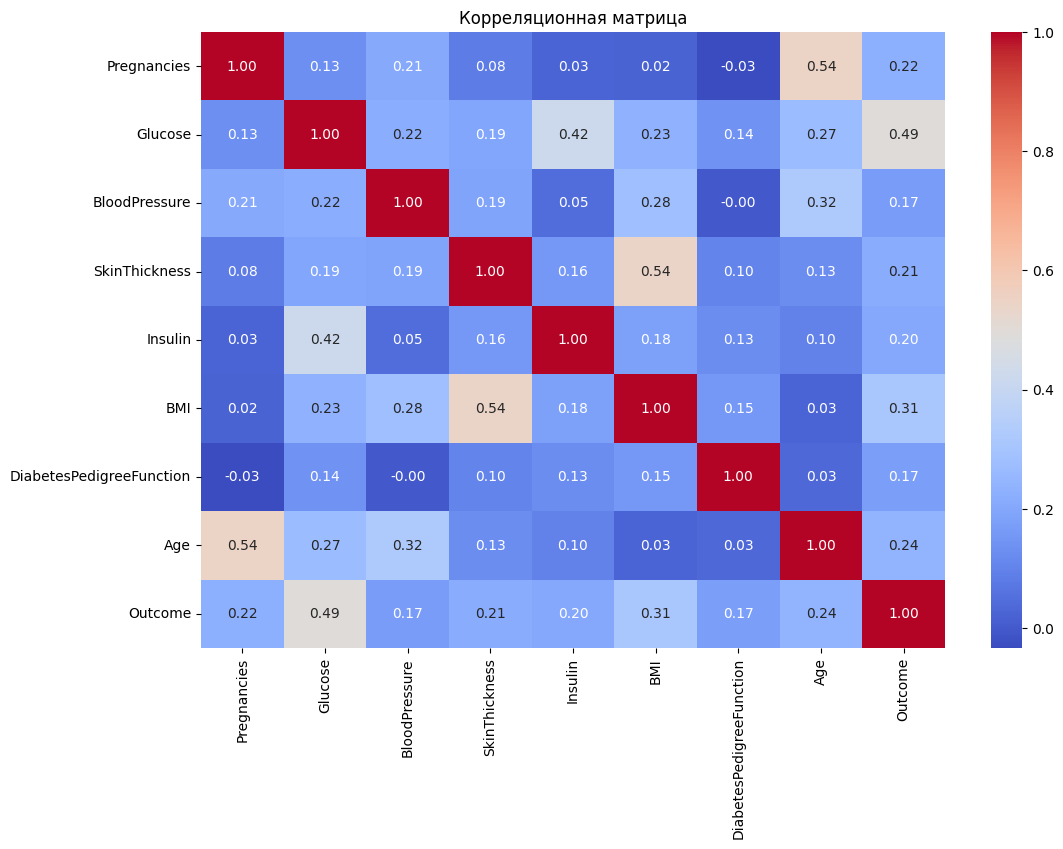


Корреляция признаков с целевой переменной:
Outcome                     1.000000
Glucose                     0.492782
BMI                         0.312038
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.203790
DiabetesPedigreeFunction    0.173844
BloodPressure               0.165723
Name: Outcome, dtype: float64


In [8]:
# Построение корреляционной матрицы
plt.figure(figsize=(12, 8))
sns.heatmap(df_processed.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица')
plt.show()

# Анализ корреляции с целевой переменной
correlations = df_processed.corr()['Outcome'].sort_values(ascending=False)
print("\nКорреляция признаков с целевой переменной:")
print(correlations)

## 5. Выбор метрик

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(y_true, y_pred, y_pred_proba=None):
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1': f1_score(y_true, y_pred)
    }
    if y_pred_proba is not None:
        metrics['ROC_AUC'] = roc_auc_score(y_true, y_pred_proba)
    return metrics

## 6. Выбор моделей

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'SVC': SVC(probability=True, random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42)
}

## 7. Формирование обучающей и тестовой выборок

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер обучающей выборки: (614, 8)
Размер тестовой выборки: (154, 8)


## 8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров.

In [28]:
baseline_results = {}

for name, model in models.items():
    # Обучение модели
    model.fit(X_train, y_train)
    
    # Предсказания
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Оценка качества
    baseline_results[name] = evaluate_model(y_test, y_pred, y_pred_proba)

# Вывод результатов
print("\nРезультаты базовых моделей:")
pd.DataFrame(baseline_results).round(3)




Результаты базовых моделей:


,LogisticRegression,SVC,DecisionTree,RandomForest,GradientBoosting
Accuracy,0.701,0.734,0.682,0.779,0.760
Precision,0.587,0.644,0.553,0.727,0.689
Recall,0.500,0.537,0.481,0.593,0.574
F1,0.540,0.586,0.515,0.653,0.626
ROC_AUC,0.813,0.796,0.636,0.819,0.831


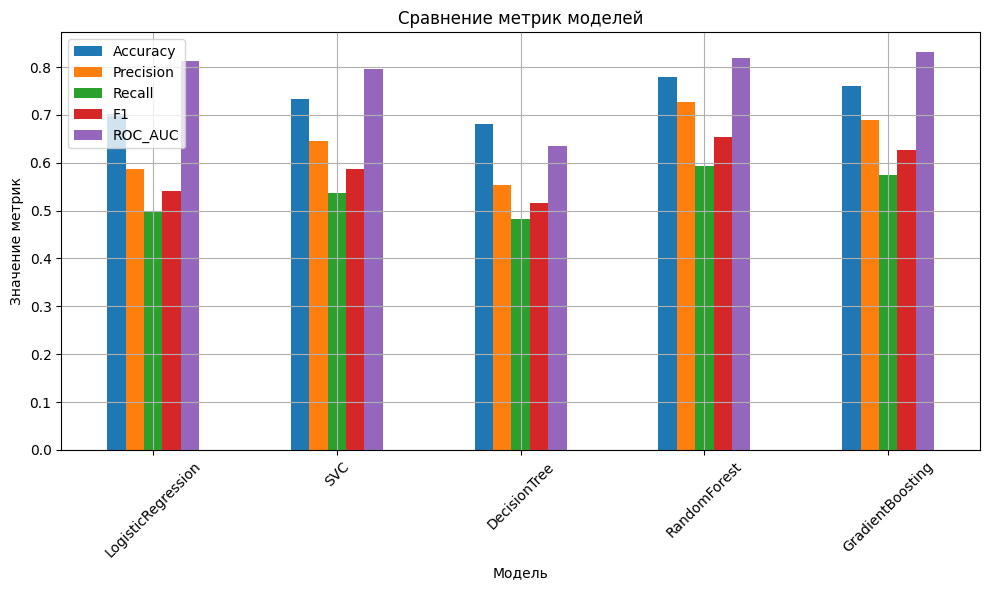

In [29]:
import matplotlib.pyplot as plt

# Преобразуем baseline_results в DataFrame для удобства
results_df = pd.DataFrame(baseline_results).T

# Столбчатая диаграмма для каждой метрики
results_df.plot(kind='bar', figsize=(10, 6))
plt.title("Сравнение метрик моделей")
plt.ylabel("Значение метрик")
plt.xlabel("Модель")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Отдельно можно нарисовать ROC-AUC для наглядности
if 'roc_auc' in results_df.columns:
    results_df['roc_auc'].plot(kind='bar', color='skyblue', figsize=(8, 4))
    plt.title("ROC-AUC моделей")
    plt.ylabel("ROC-AUC")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## 9. Подбор гиперпараметров для RandomForest

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Параметры для перебора
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Базовая модель
rf = RandomForestClassifier(random_state=42)

# Grid Search с кросс-валидацией
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Лучшая модель
best_rf = grid_search.best_estimator_

# Предсказания
y_pred_opt = best_rf.predict(X_test)
y_pred_proba_opt = best_rf.predict_proba(X_test)[:, 1]

# Оценка
optimized_result = evaluate_model(y_test, y_pred_opt, y_pred_proba_opt)

# Вывод лучших параметров
print("Лучшие параметры RandomForest:", grid_search.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Лучшие параметры RandomForest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


## 10. Сравнение качества полученных моделей с качеством baseline-моделей.


Сравнение всех моделей (включая оптимизированную):
                       Accuracy  Precision  Recall     F1  ROC_AUC
LogisticRegression        0.701      0.587   0.500  0.540    0.813
SVC                       0.734      0.644   0.537  0.586    0.796
DecisionTree              0.682      0.553   0.481  0.515    0.636
RandomForest              0.779      0.727   0.593  0.653    0.819
GradientBoosting          0.760      0.689   0.574  0.626    0.831
OptimizedRandomForest     0.740      0.646   0.574  0.608    0.809


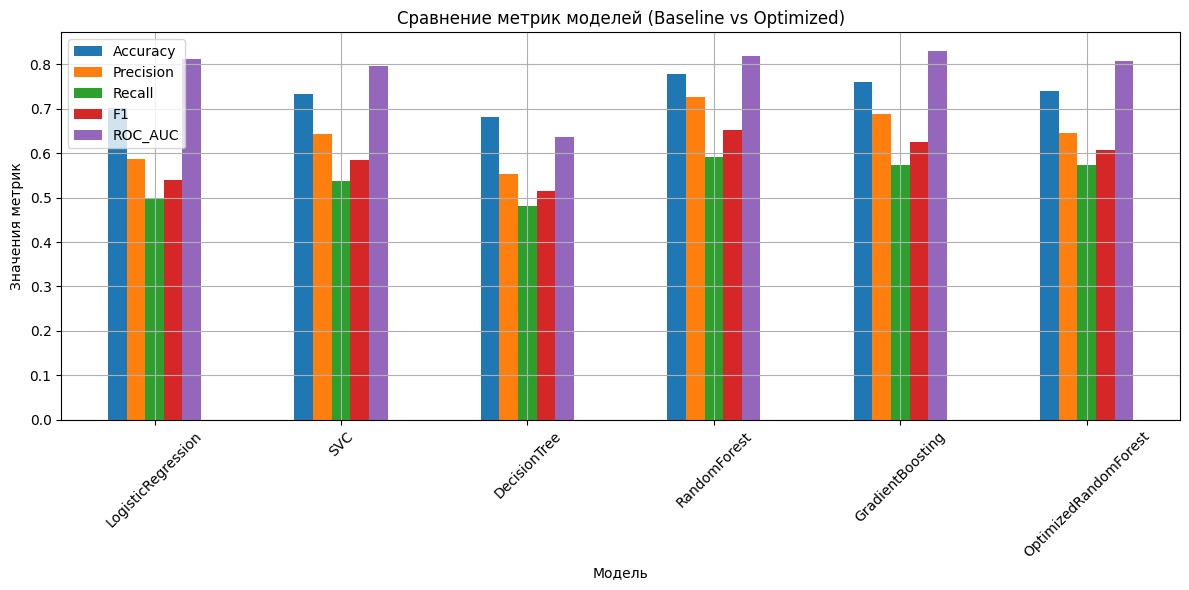

In [32]:
# Добавляем оптимизированную модель в baseline_results
baseline_plus_optimized = baseline_results.copy()
baseline_plus_optimized['OptimizedRandomForest'] = optimized_result

# Преобразуем в DataFrame
comparison_df = pd.DataFrame(baseline_plus_optimized).T

print("\nСравнение всех моделей (включая оптимизированную):")
print(comparison_df.round(3))

# Визуализация
comparison_df.plot(kind='bar', figsize=(12, 6))
plt.title("Сравнение метрик моделей (Baseline vs Optimized)")
plt.ylabel("Значения метрик")
plt.xlabel("Модель")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## 11. Формирование выводов о качестве построенных моделей на основе выбранных метрик.

**Среди построенных моделей наилучшие результаты показали RandomForest и GradientBoosting. Базовая версия RandomForest продемонстрировала самые высокие значения accuracy, precision, recall и f1-меры, тогда как GradientBoosting показал наивысшее значение ROC AUC, что особенно важно при наличии дисбаланса классов.**